In [3]:
# 필요한 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

In [19]:
# 경고 안보이기
import warnings
warnings.filterwarnings('ignore', 'ConvergenceWarning')
warnings.filterwarnings('ignore', 'UserWarning')
# 특정 경고 메시지를 억제
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')
warnings.filterwarnings('ignore', category=FutureWarning, module='statsmodels')

In [15]:
# 시각화 한글폰트
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
# Load the CSV file
# 기본 경로 지정
base_path = 'F:/cluster_test_2024/search_results_2024_06-04_combined'
filename = 'df_combined_search_results_uid-year-techfull_only.csv'
# 파일의 전체 경로
file_path = os.path.join(base_path, filename)
df = pd.read_csv(file_path)

In [5]:
# Group by 'key' and 'pubyear', and count the unique 'uid' entries for each group
grouped_df = df.groupby(['key', 'pubyear']).agg(uid_count=('uid', 'nunique')).reset_index()

# Filter the dataframe for the specified key and year range
filtered_df = grouped_df[(grouped_df['key'] == "01. 금속 3D 프린팅(gpt_wo_abbr.)") & 
                         (grouped_df['pubyear'] >= 2006) & 
                         (grouped_df['pubyear'] <= 2018)]

# Select only the 'pubyear' and 'uid_count' columns for the series
uid_count_series = filtered_df.set_index('pubyear')['uid_count']

In [8]:
uid_count_series

pubyear
2006     13
2007     11
2008      8
2009      9
2010      3
2011      3
2012     11
2013     23
2014     20
2015     34
2016     70
2017     98
2018    146
Name: uid_count, dtype: int64

In [9]:
# Define the ARIMA model parameters
p = 2
d = 1
q = 2

# Fit the ARIMA model
model = SARIMAX(uid_count_series, order=(p, d, q))
model_fit = model.fit(disp=False)

# Forecast future values from 2019 to 2023
forecast_years = [2019, 2020, 2021, 2022, 2023]
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_series = forecast.predicted_mean

# Obtain the confidence intervals for the forecast
forecast_ci = forecast.conf_int()
forecast_ci.index = pd.Index(forecast_years)
lower_bounds = forecast_ci.iloc[:, 0].to_numpy().astype(float)
upper_bounds = forecast_ci.iloc[:, 1].to_numpy().astype(float)

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an 

In [12]:
forecast

In [11]:
forecast_ci

,lower uid_count,upper uid_count
2019,168.261748,212.314531
2020,178.299311,275.056317
2021,188.792795,338.508351
2022,190.713194,401.020524
2023,190.779985,463.639738


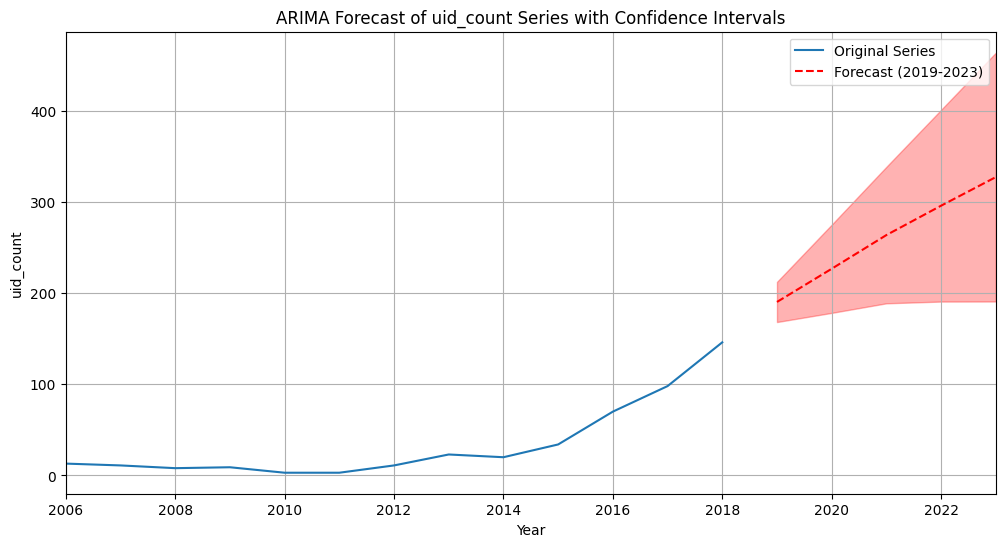

In [13]:
# Plot the original series, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(uid_count_series, label='Original Series')
plt.plot(forecast_years, forecast_series, label='Forecast (2019-2023)', color='red', linestyle='--')
plt.fill_between(forecast_years, lower_bounds, upper_bounds, color='red', alpha=0.3)
plt.title('ARIMA Forecast of uid_count Series with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('uid_count')
plt.xlim([2006, 2023])
plt.legend()
plt.grid(True)
plt.show()

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an 

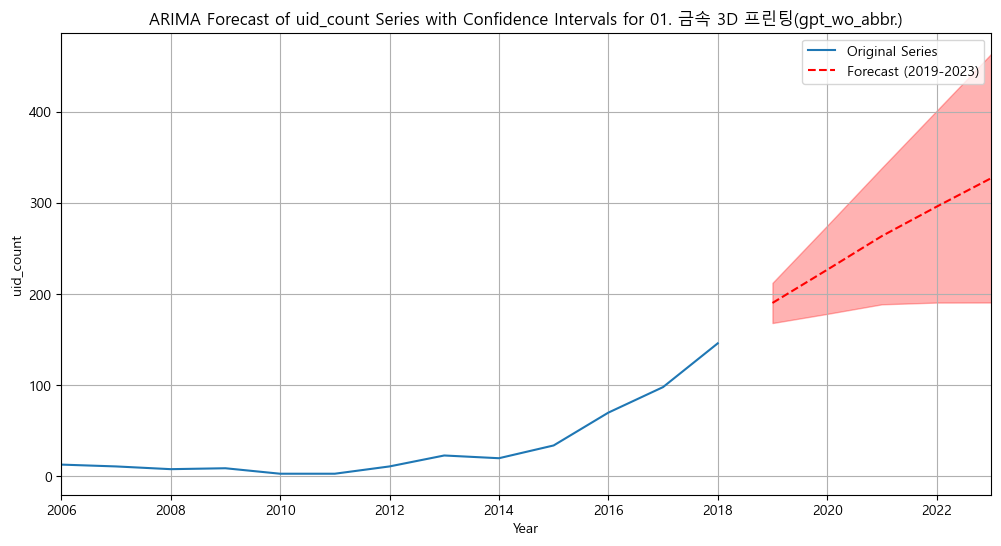

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an 

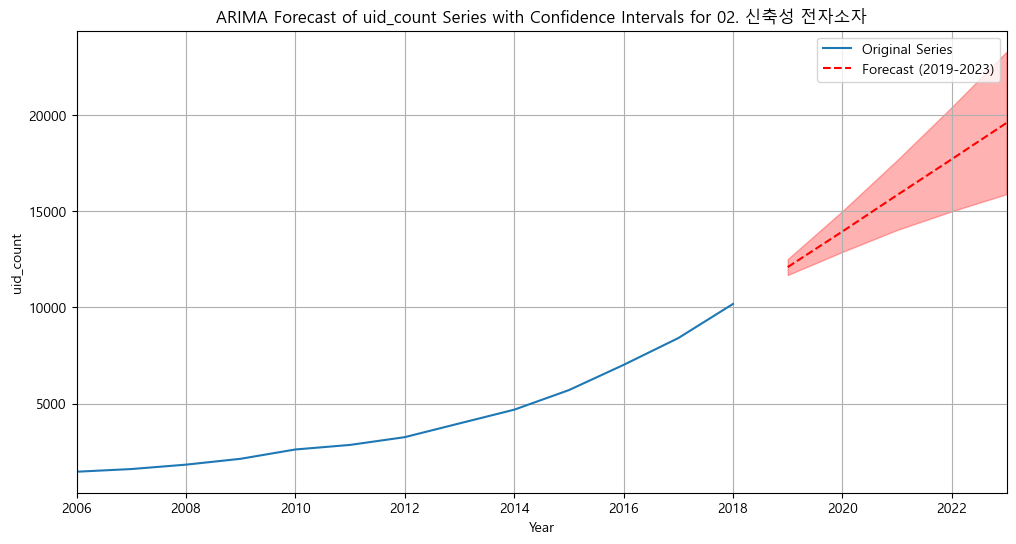

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an 

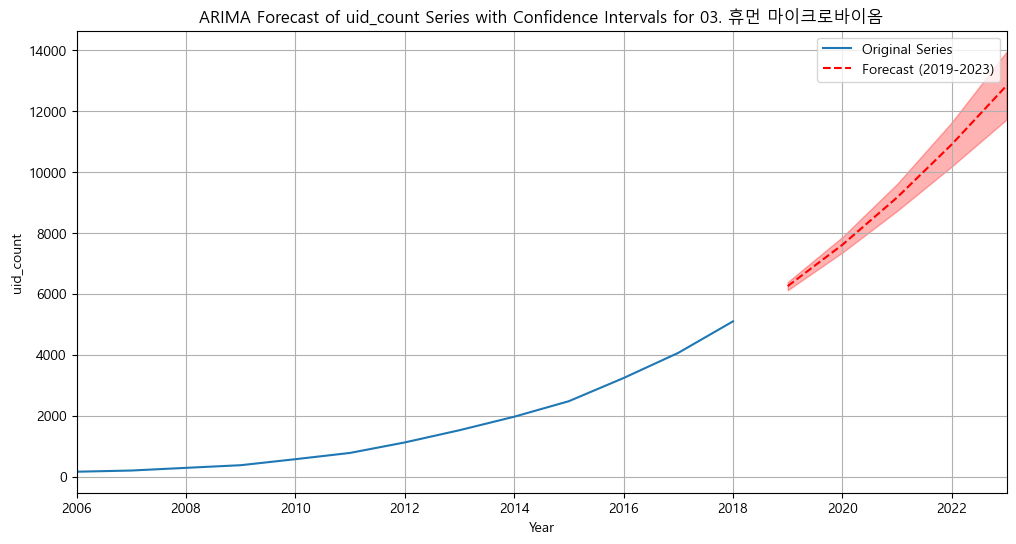

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer i

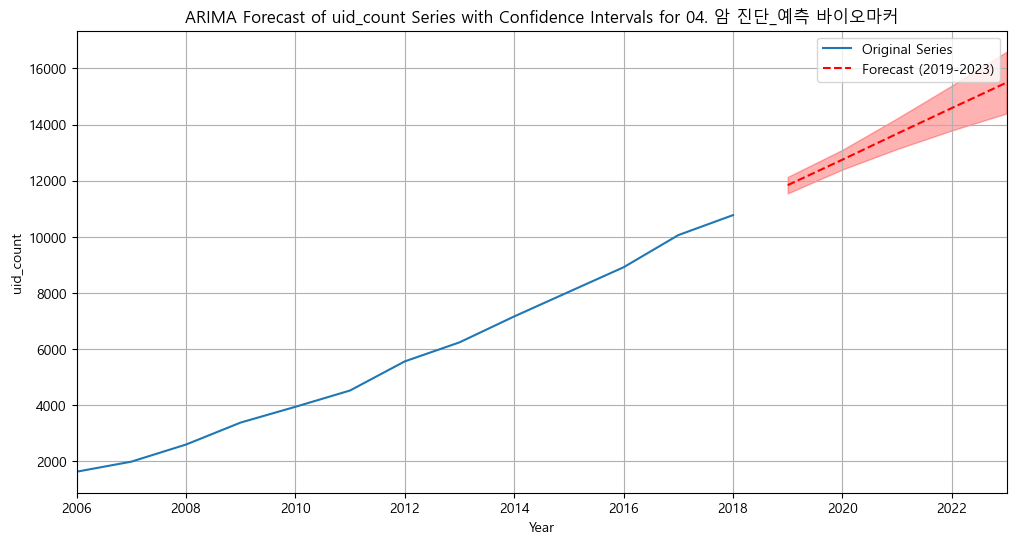

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer i

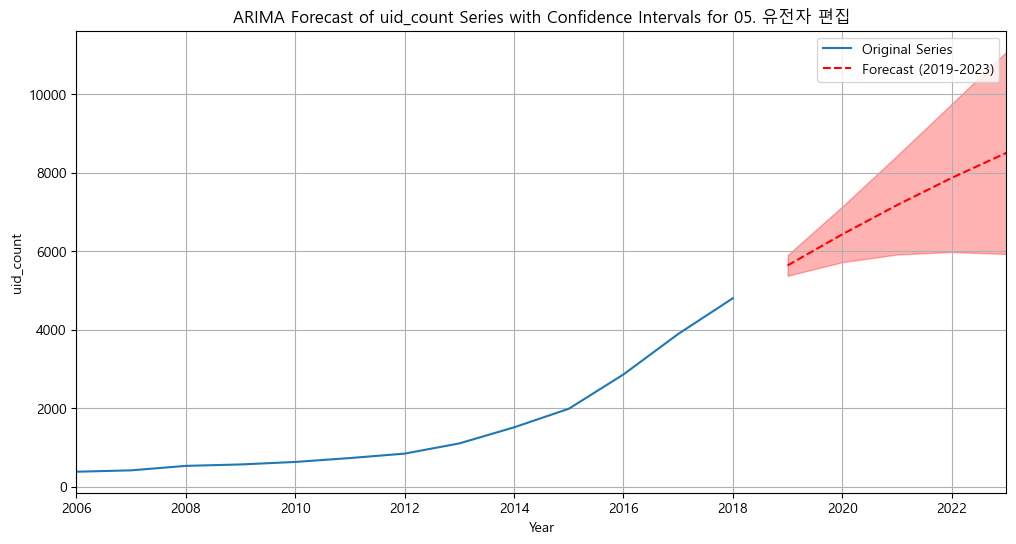

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer i

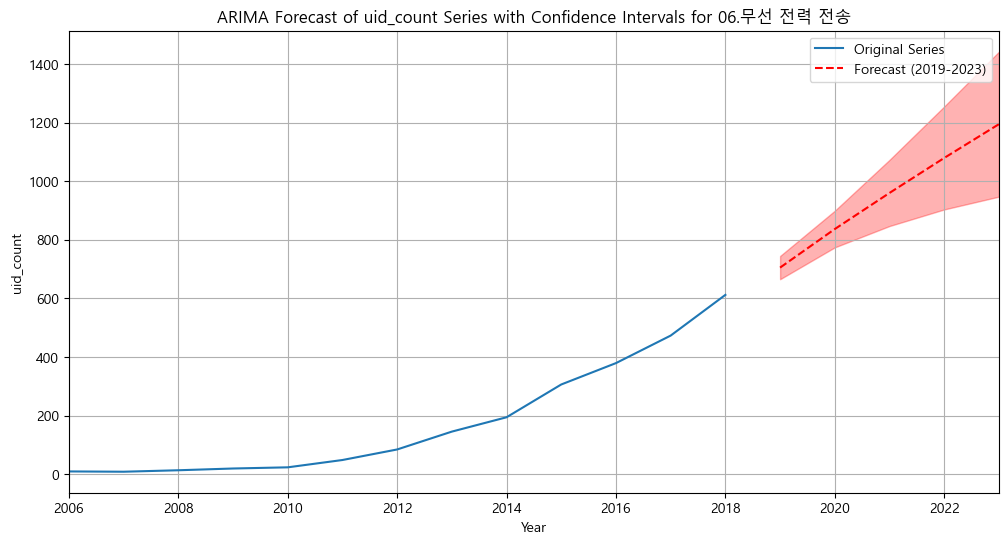

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model wi

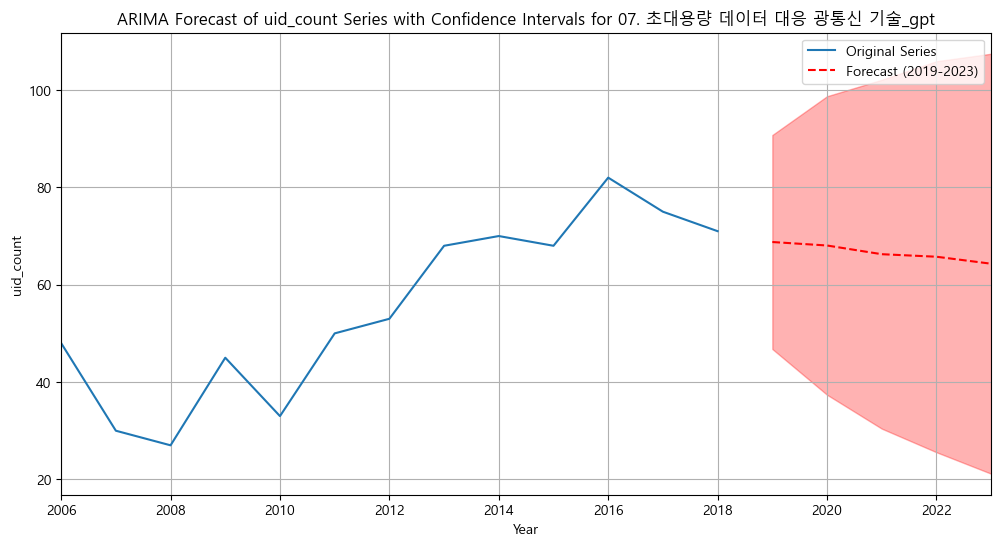

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an 

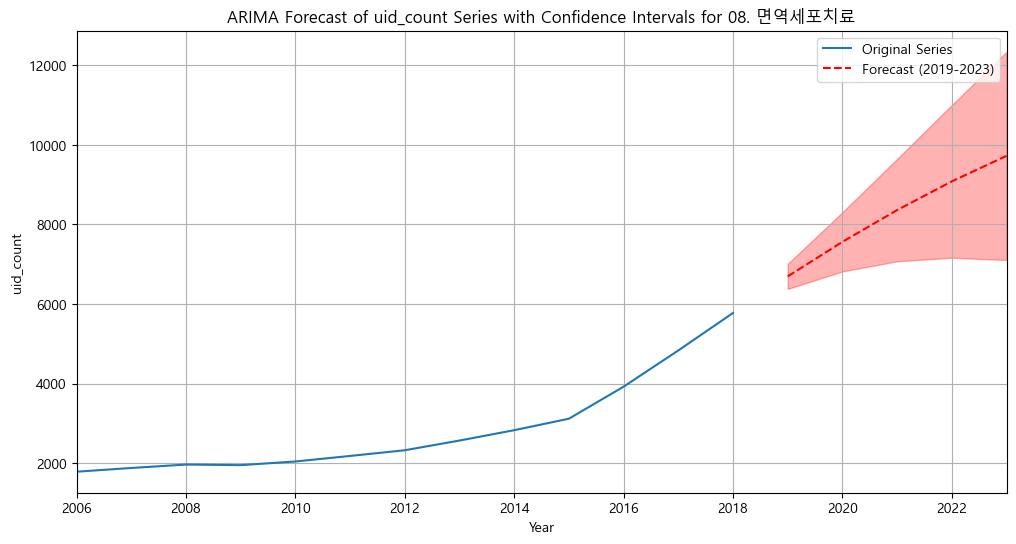

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model wi

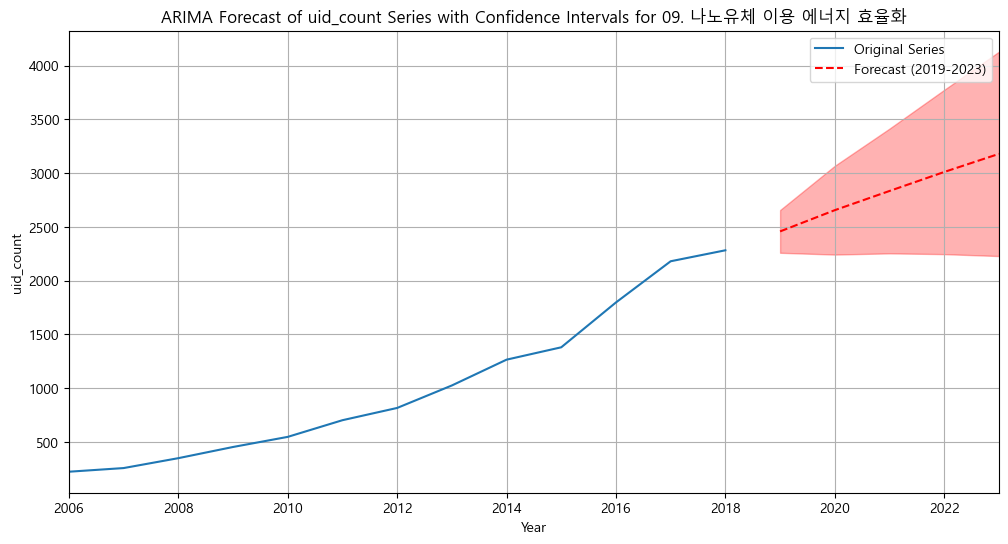

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this met

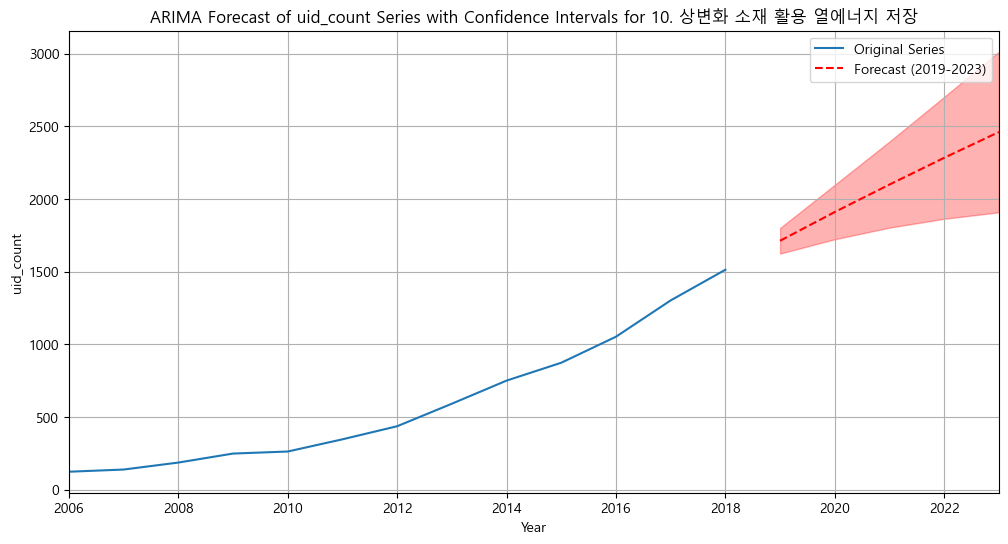

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an 

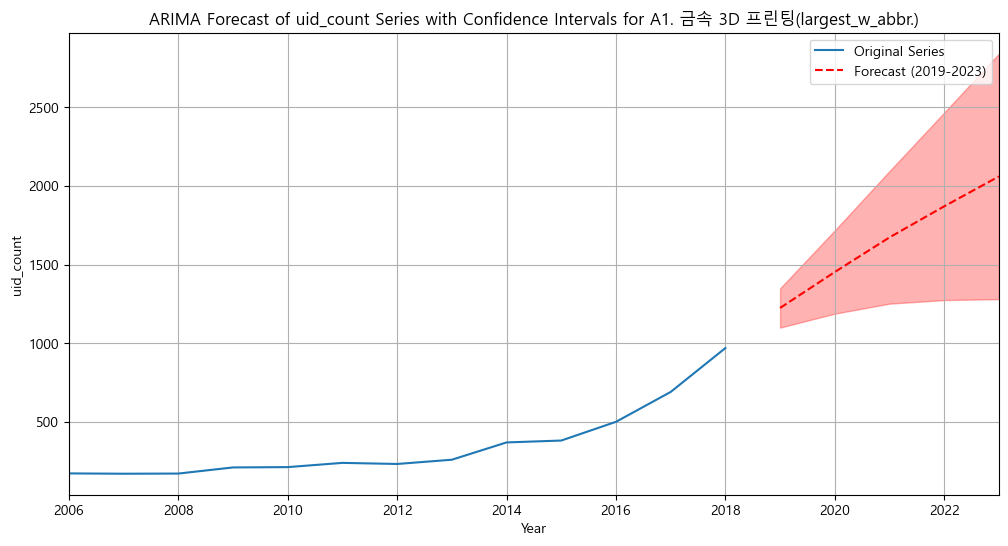

In [16]:
# Define the ARIMA model parameters
p = 2
d = 1
q = 2

# Get unique keys
keys = df['key'].unique()

for key in keys:
    # Filter the dataframe for the specified key and year range
    filtered_df = grouped_df[(grouped_df['key'] == key) & 
                             (grouped_df['pubyear'] >= 2006) & 
                             (grouped_df['pubyear'] <= 2018)]

    if not filtered_df.empty:
        # Select only the 'pubyear' and 'uid_count' columns for the series
        uid_count_series = filtered_df.set_index('pubyear')['uid_count']

        # Fit the ARIMA model
        model = SARIMAX(uid_count_series, order=(p, d, q))
        model_fit = model.fit(disp=False)

        # Forecast future values from 2019 to 2023
        forecast_years = [2019, 2020, 2021, 2022, 2023]
        forecast = model_fit.get_forecast(steps=len(forecast_years))
        forecast_series = forecast.predicted_mean

        # Obtain the confidence intervals for the forecast
        forecast_ci = forecast.conf_int()
        forecast_ci.index = pd.Index(forecast_years)
        lower_bounds = forecast_ci.iloc[:, 0].to_numpy().astype(float)
        upper_bounds = forecast_ci.iloc[:, 1].to_numpy().astype(float)

        # Plot the original series, forecast, and confidence intervals
        plt.figure(figsize=(12, 6))
        plt.plot(uid_count_series, label='Original Series')
        plt.plot(forecast_years, forecast_series, label='Forecast (2019-2023)', color='red', linestyle='--')
        plt.fill_between(forecast_years, lower_bounds, upper_bounds, color='red', alpha=0.3)
        plt.title(f'ARIMA Forecast of uid_count Series with Confidence Intervals for {key}')
        plt.xlabel('Year')
        plt.ylabel('uid_count')
        plt.xlim([2006, 2023])
        plt.legend()
        plt.grid(True)
        plt.show()

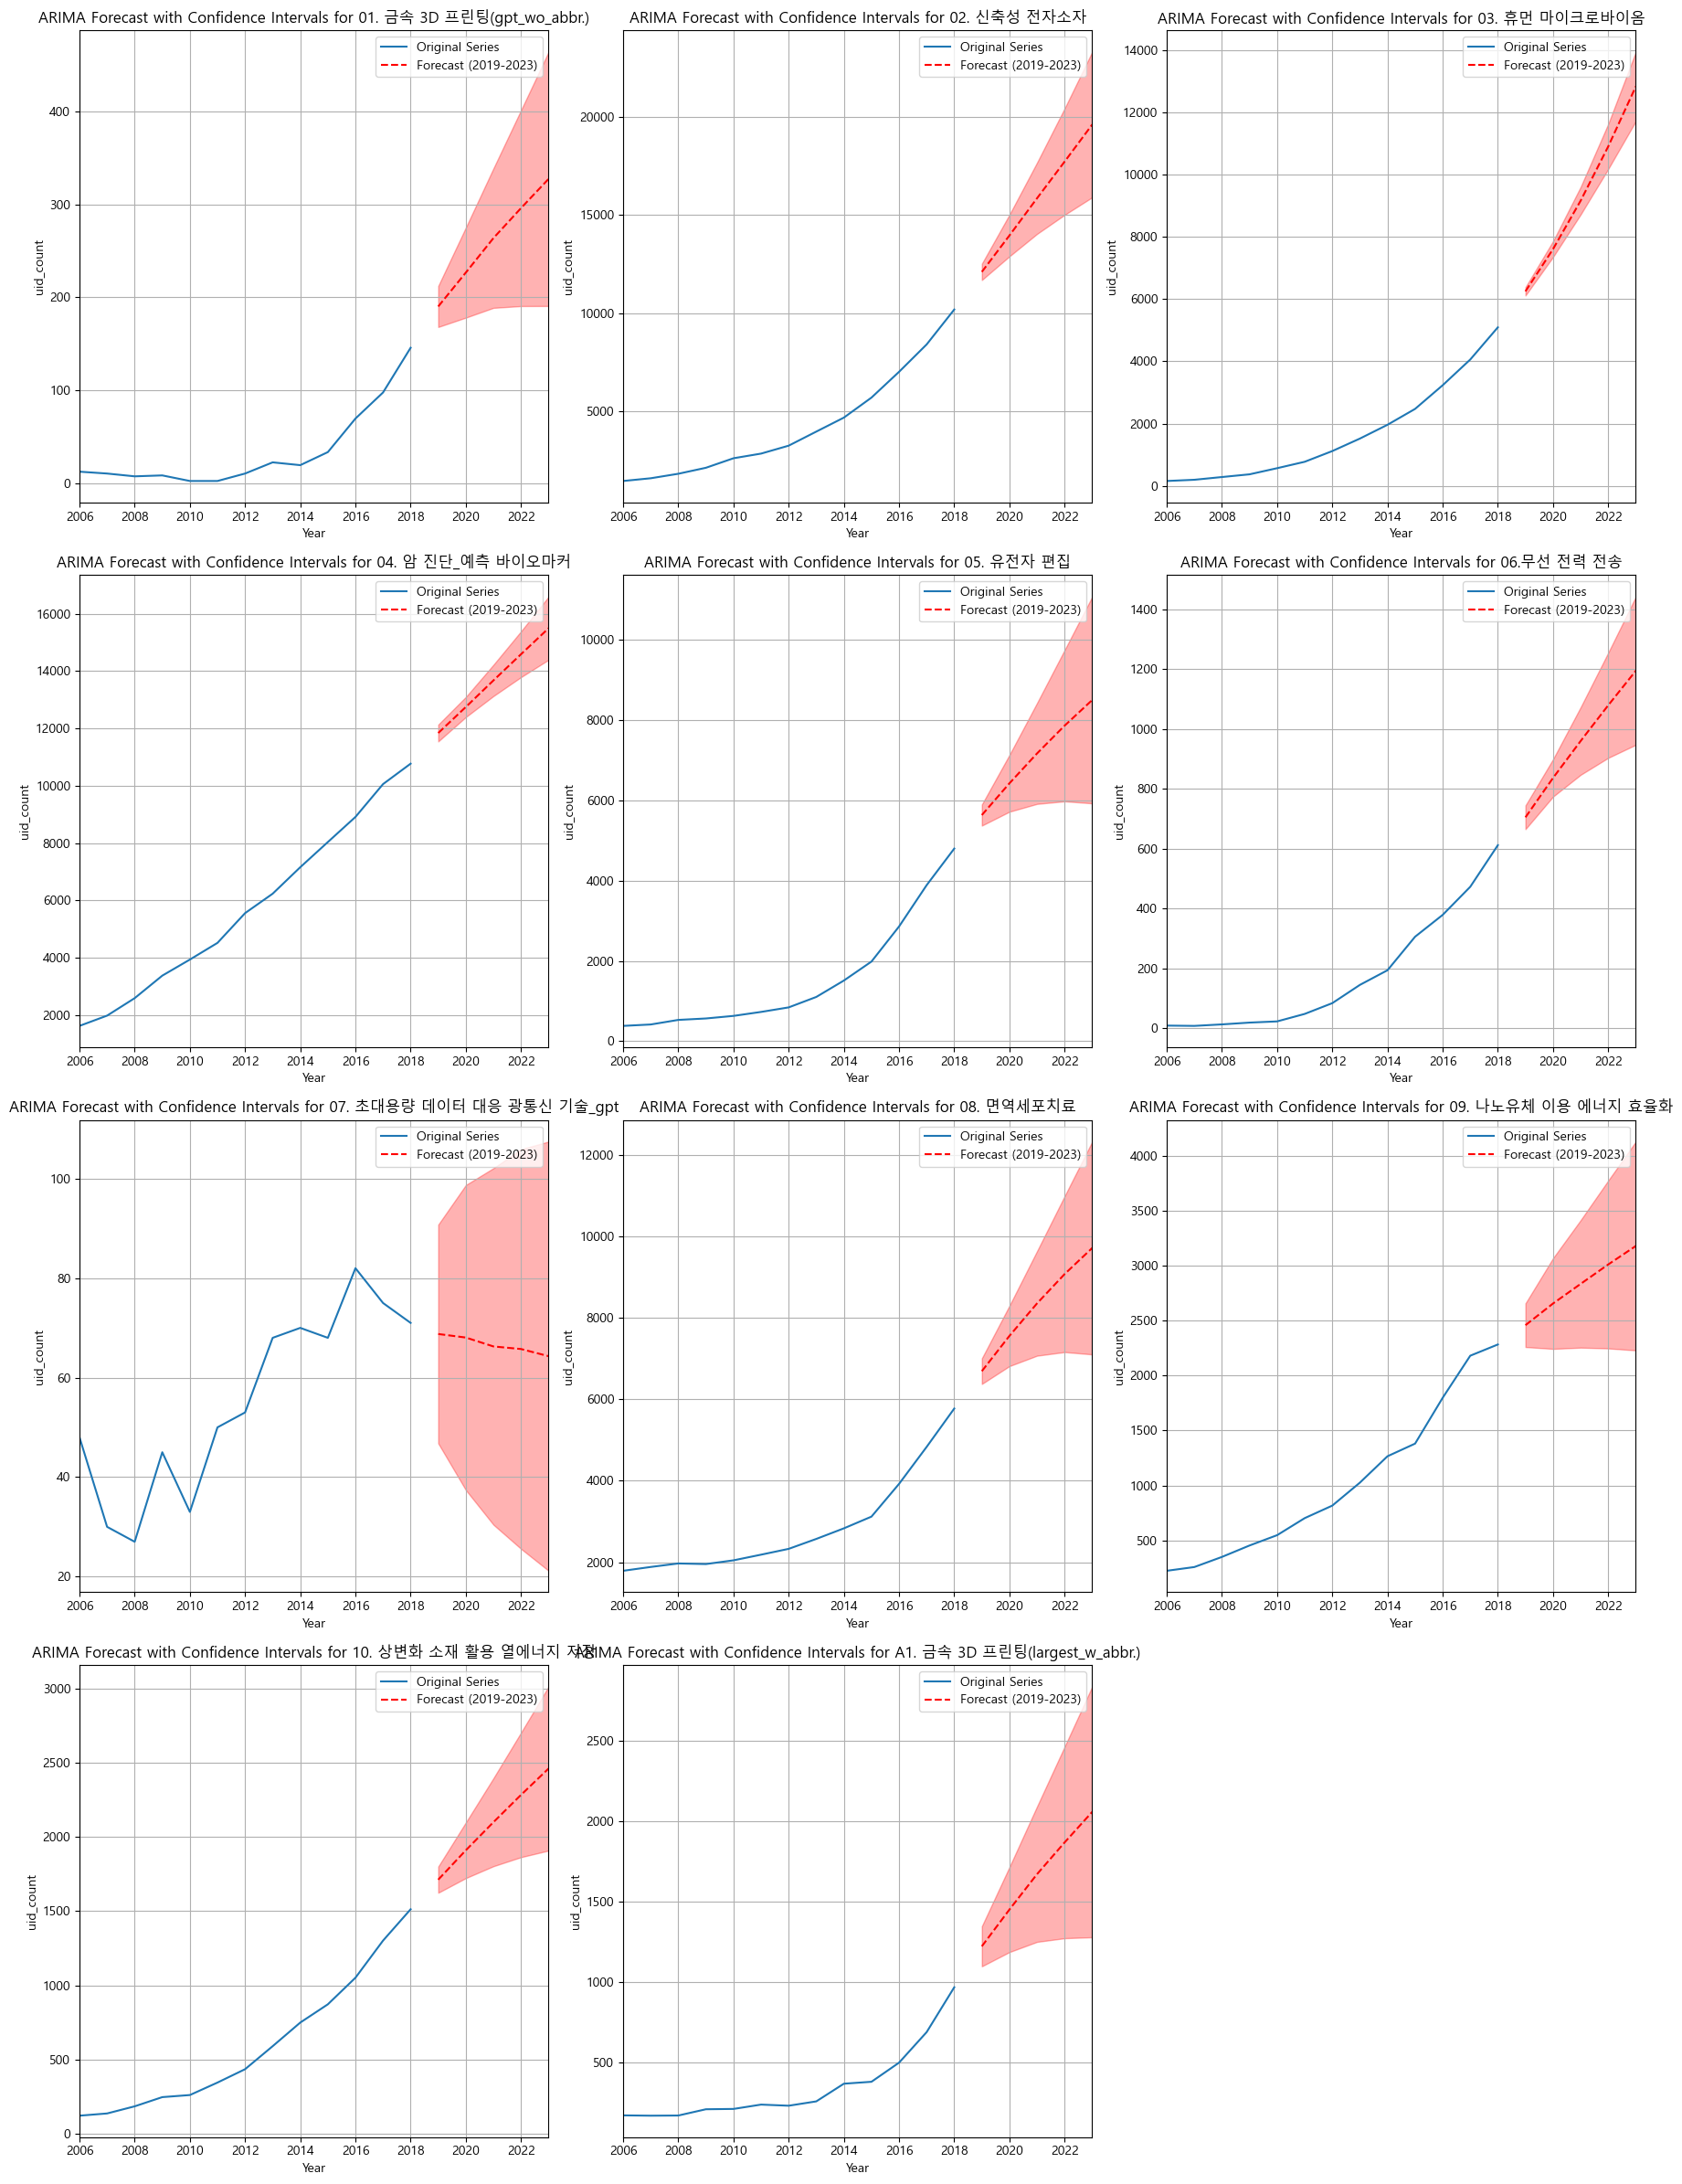

In [20]:
# Define the ARIMA model parameters
p = 2
d = 1
q = 2

# Get unique keys
keys = df['key'].unique()

# Dictionary to store the results
results = {}

# Loop through each key and perform ARIMA forecast
for key in keys:
    # Filter the dataframe for the specified key and year range
    filtered_df = grouped_df[(grouped_df['key'] == key) & 
                             (grouped_df['pubyear'] >= 2006) & 
                             (grouped_df['pubyear'] <= 2018)]

    if not filtered_df.empty:
        # Select only the 'pubyear' and 'uid_count' columns for the series
        uid_count_series = filtered_df.set_index('pubyear')['uid_count']

        # Fit the ARIMA model
        model = SARIMAX(uid_count_series, order=(p, d, q))
        model_fit = model.fit(disp=False)

        # Forecast future values from 2019 to 2023
        forecast_years = [2019, 2020, 2021, 2022, 2023]
        forecast = model_fit.get_forecast(steps=len(forecast_years))
        forecast_series = forecast.predicted_mean

        # Obtain the confidence intervals for the forecast
        forecast_ci = forecast.conf_int()
        forecast_ci.index = pd.Index(forecast_years)

        # Store results in the dictionary
        results[key] = {
            'original': uid_count_series,
            'forecast': forecast_series,
            'lower_bounds': forecast_ci.iloc[:, 0],
            'upper_bounds': forecast_ci.iloc[:, 1]
        }

# Plotting
num_keys = len(results)
cols = 3
rows = (num_keys // cols) + (num_keys % cols > 0)

plt.figure(figsize=(18, rows * 6))

for i, (key, result) in enumerate(results.items()):
    plt.subplot(rows, cols, i + 1)
    plt.plot(result['original'], label='Original Series')
    plt.plot(forecast_years, result['forecast'], label='Forecast (2019-2023)', color='red', linestyle='--')
    plt.fill_between(forecast_years, result['lower_bounds'], result['upper_bounds'], color='red', alpha=0.3)
    plt.title(f'ARIMA Forecast with Confidence Intervals for {key}')
    plt.xlabel('Year')
    plt.ylabel('uid_count')
    plt.xlim([2006, 2023])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


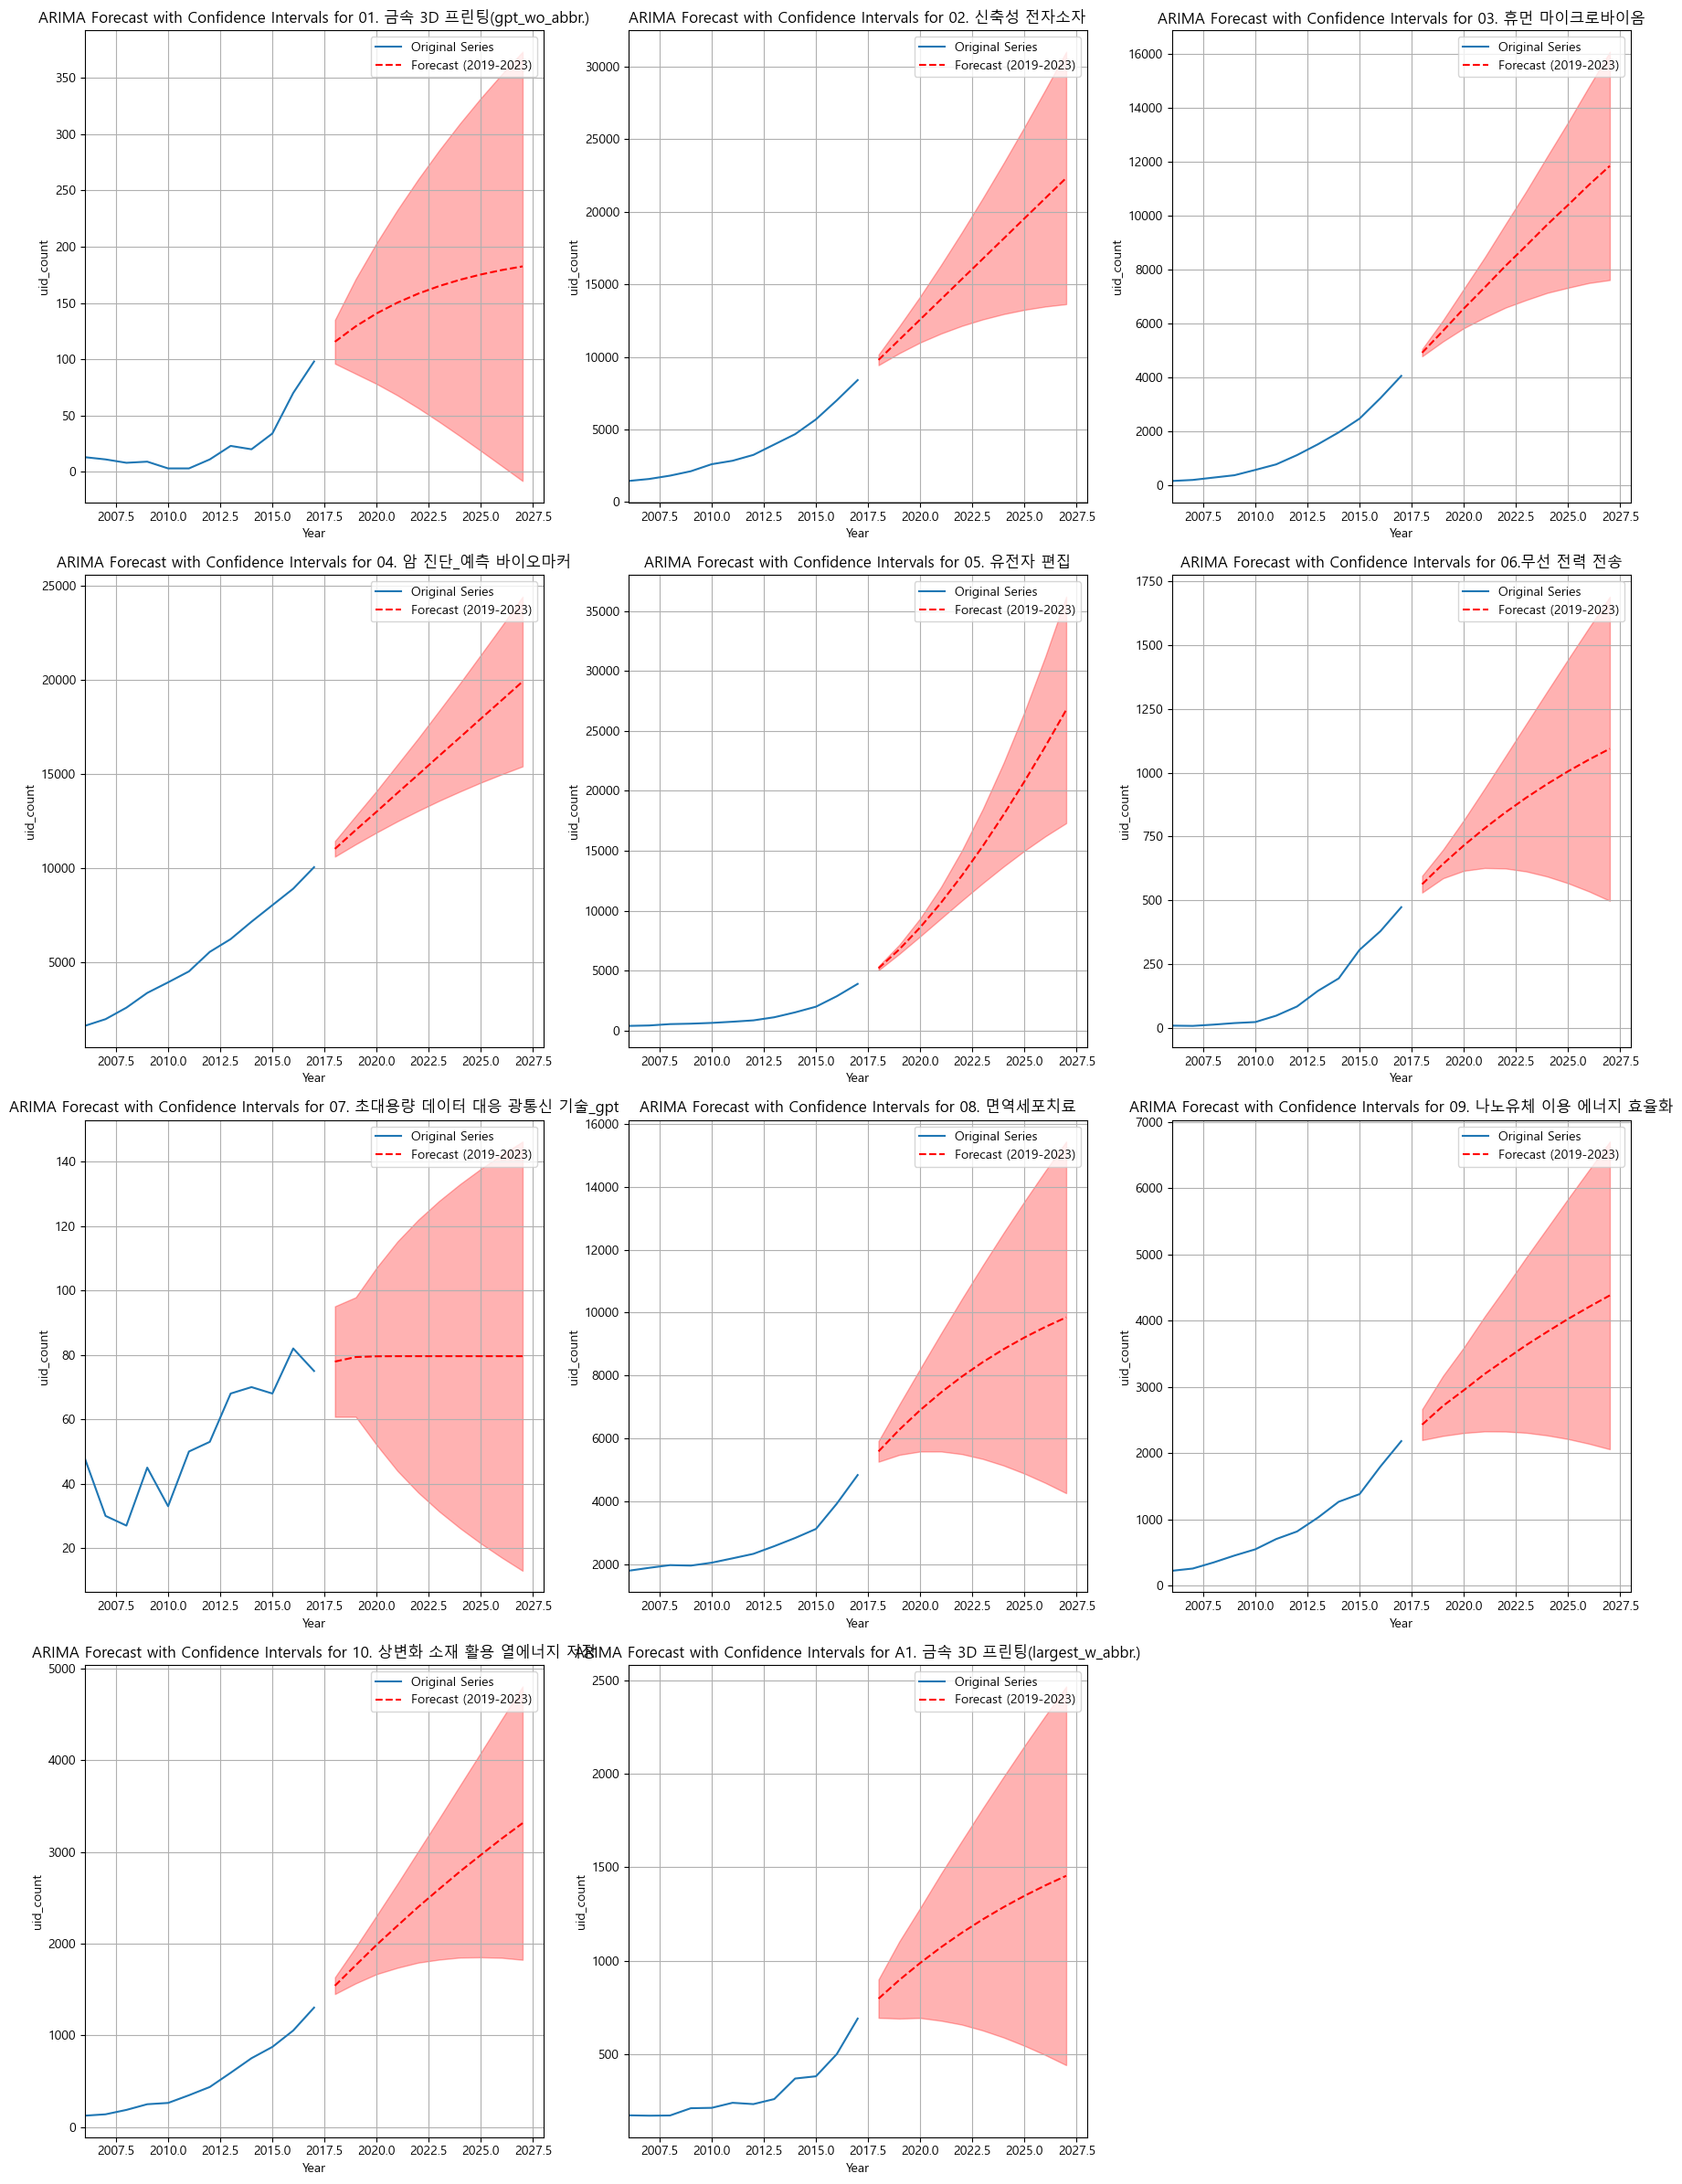

In [23]:
# Define the ARIMA model parameters
p = 2
d = 1
q = 2

# Get unique keys
keys = df['key'].unique()

# Dictionary to store the results
results = {}

# Loop through each key and perform ARIMA forecast
for key in keys:
    # Filter the dataframe for the specified key and year range
    filtered_df = grouped_df[(grouped_df['key'] == key) & 
                             (grouped_df['pubyear'] >= 2006) & 
                             (grouped_df['pubyear'] <= 2017)]

    if not filtered_df.empty:
        # Select only the 'pubyear' and 'uid_count' columns for the series
        uid_count_series = filtered_df.set_index('pubyear')['uid_count']

        # Fit the ARIMA model
        model = SARIMAX(uid_count_series, order=(p, d, q))
        model_fit = model.fit(disp=False)

        # Forecast future values from 2019 to 2023
        forecast_years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,2027]
        forecast = model_fit.get_forecast(steps=len(forecast_years))
        forecast_series = forecast.predicted_mean

        # Obtain the confidence intervals for the forecast
        forecast_ci = forecast.conf_int()
        forecast_ci.index = pd.Index(forecast_years)

        # Store results in the dictionary
        results[key] = {
            'original': uid_count_series,
            'forecast': forecast_series,
            'lower_bounds': forecast_ci.iloc[:, 0],
            'upper_bounds': forecast_ci.iloc[:, 1]
        }

# Plotting
num_keys = len(results)
cols = 3
rows = (num_keys // cols) + (num_keys % cols > 0)

plt.figure(figsize=(18, rows * 6))

for i, (key, result) in enumerate(results.items()):
    plt.subplot(rows, cols, i + 1)
    plt.plot(result['original'], label='Original Series')
    plt.plot(forecast_years, result['forecast'], label='Forecast (2019-2023)', color='red', linestyle='--')
    plt.fill_between(forecast_years, result['lower_bounds'], result['upper_bounds'], color='red', alpha=0.3)
    plt.title(f'ARIMA Forecast with Confidence Intervals for {key}')
    plt.xlabel('Year')
    plt.ylabel('uid_count')
    plt.xlim([2006, 2028])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


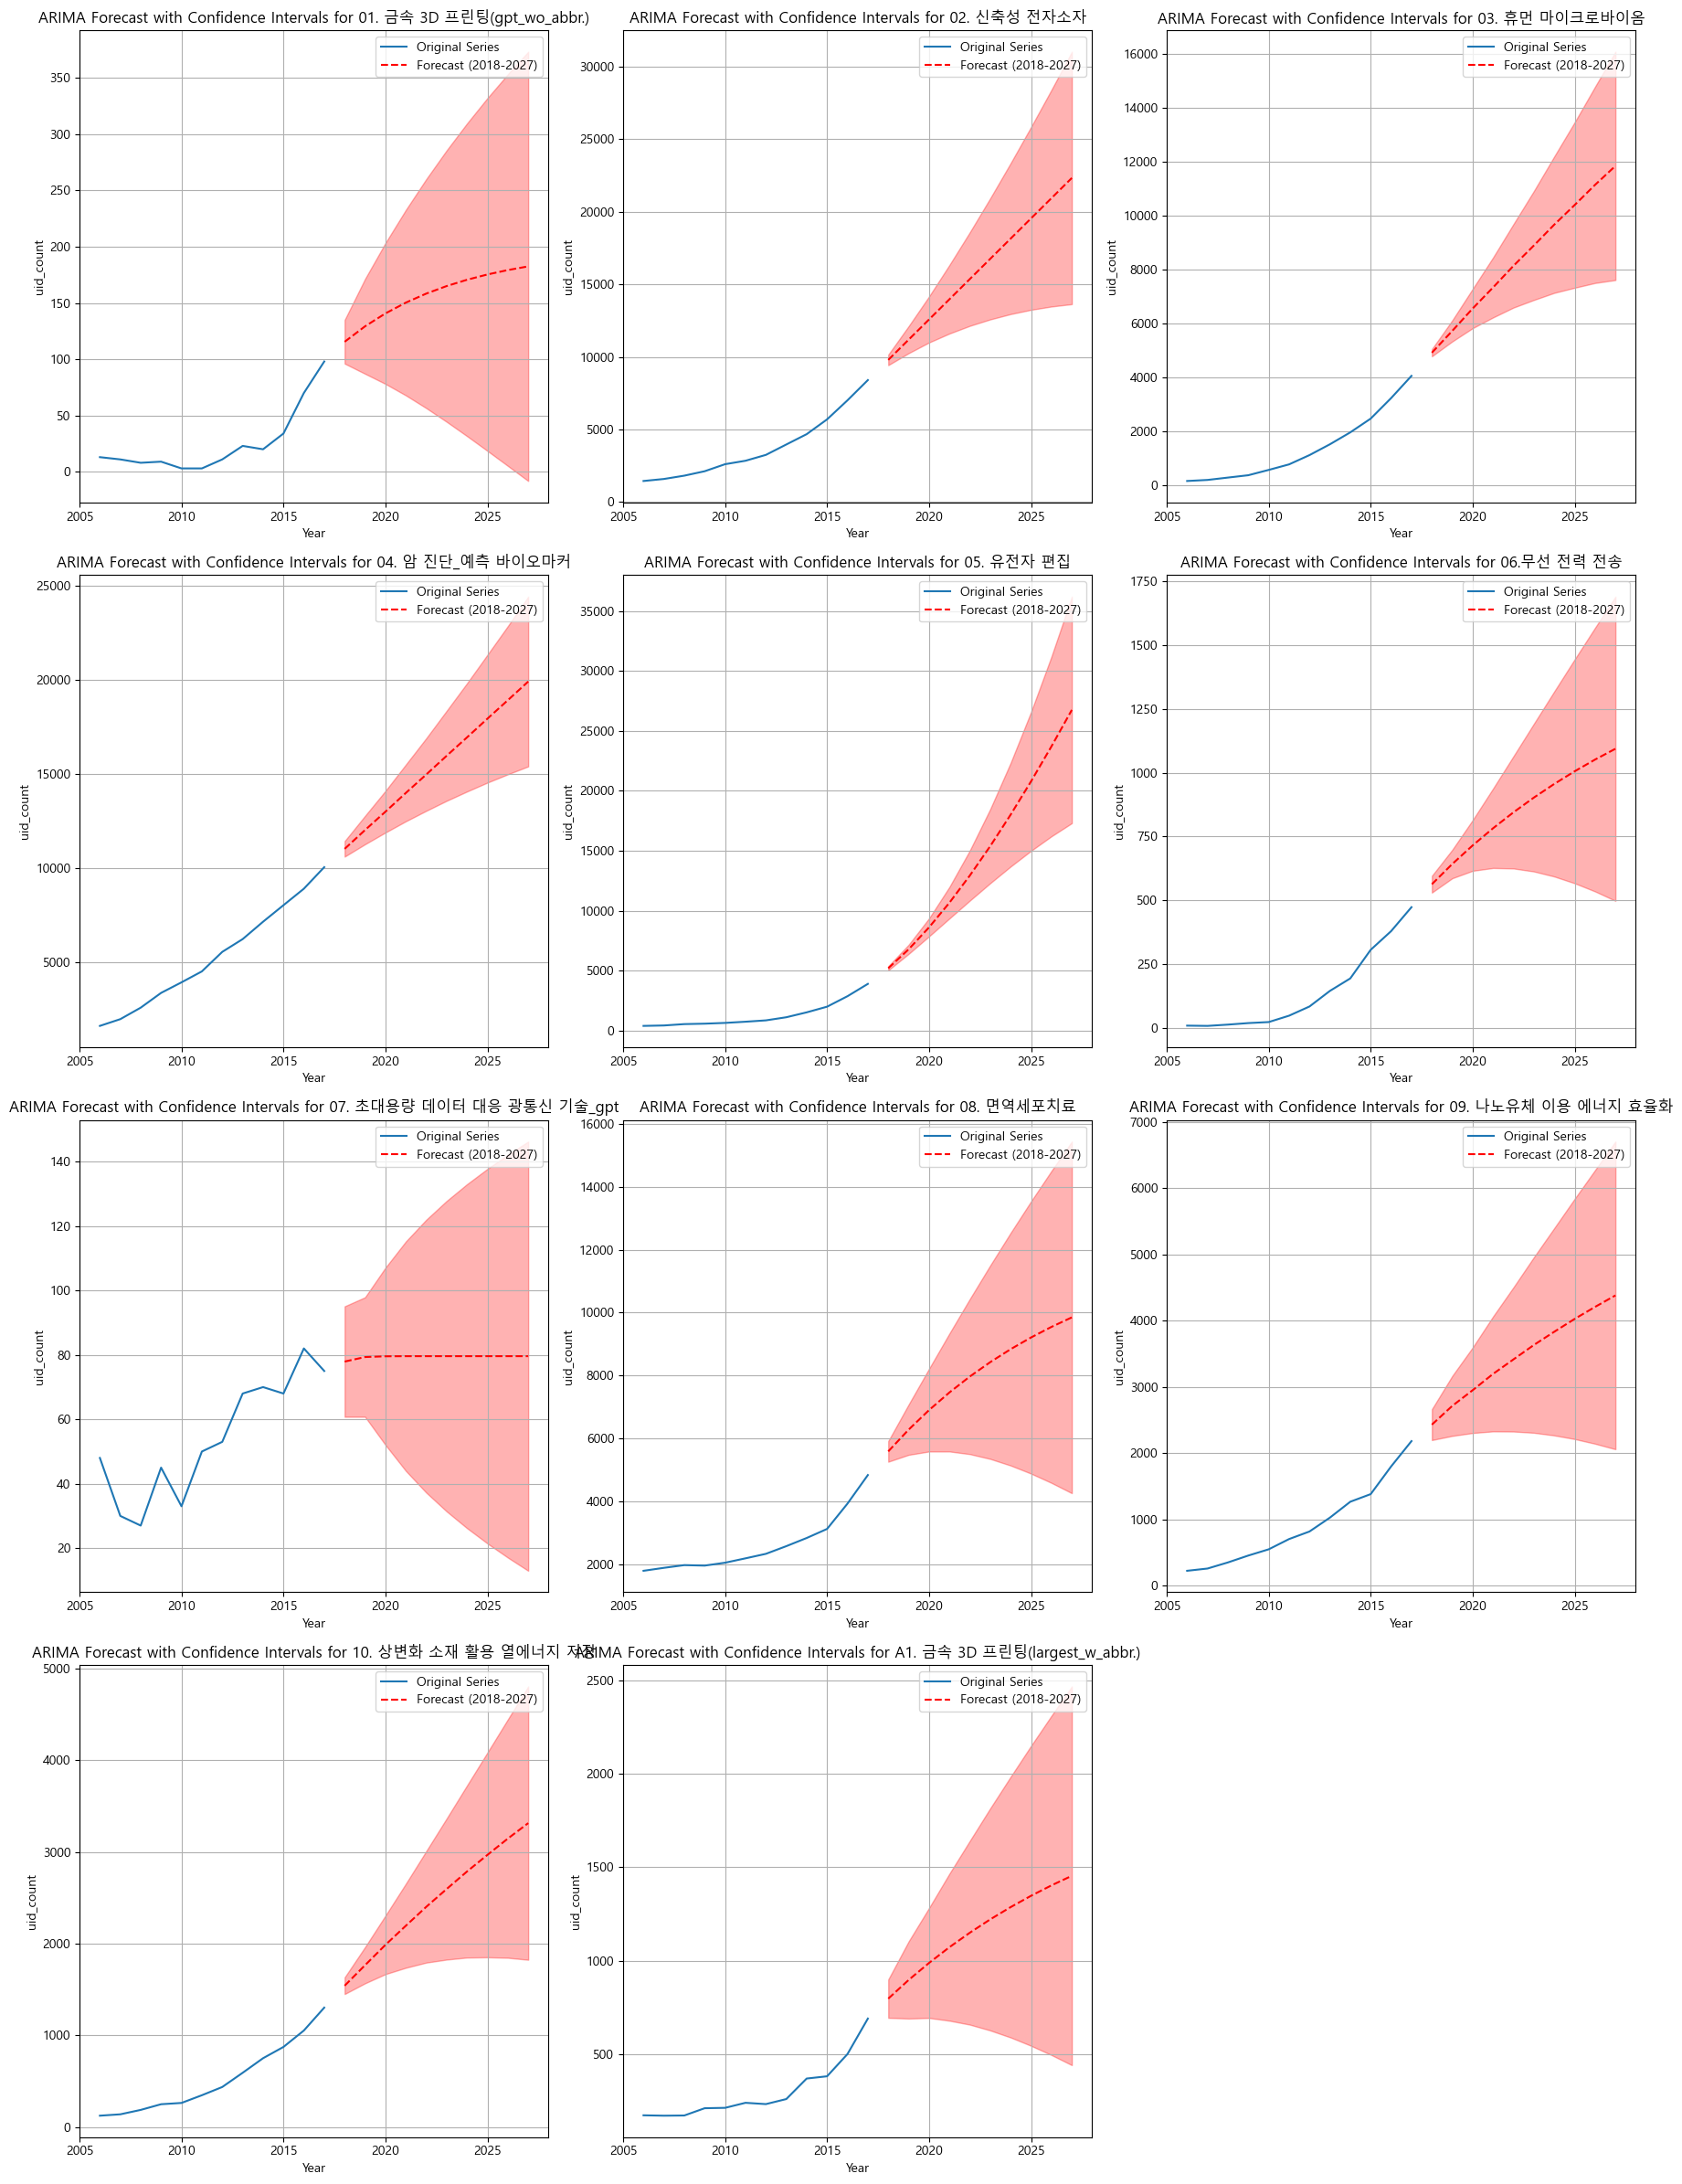

In [32]:
# Define the ARIMA model parameters
p = 2
d = 1
q = 2

# Get unique keys
keys = df['key'].unique()

# Dictionary to store the results
results = {}

# Loop through each key and perform ARIMA forecast
for key in keys:
    # Filter the dataframe for the specified key and year range
    filtered_df = grouped_df[(grouped_df['key'] == key) & 
                             (grouped_df['pubyear'] >= 2006) & 
                             (grouped_df['pubyear'] <= 2017)]

    if not filtered_df.empty:
        # Select only the 'pubyear' and 'uid_count' columns for the series
        uid_count_series = filtered_df.set_index('pubyear')['uid_count']

        # Fit the ARIMA model
        model = SARIMAX(uid_count_series, order=(p, d, q))
        model_fit = model.fit(disp=False)

        # Forecast future values from 2019 to 2023
        forecast_years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,2027]
        forecast = model_fit.get_forecast(steps=len(forecast_years))
        forecast_series = forecast.predicted_mean

        # Obtain the confidence intervals for the forecast
        forecast_ci = forecast.conf_int()
        forecast_ci.index = pd.Index(forecast_years)

        # Store results in the dictionary
        results[key] = {
            'original': uid_count_series,
            'forecast': forecast_series,
            'lower_bounds': forecast_ci.iloc[:, 0],
            'upper_bounds': forecast_ci.iloc[:, 1]
        }

# Plotting
num_keys = len(results)
cols = 3
rows = (num_keys // cols) + (num_keys % cols > 0)

plt.figure(figsize=(18, rows * 6))

for i, (key, result) in enumerate(results.items()):
    plt.subplot(rows, cols, i + 1)
    plt.plot(result['original'], label='Original Series')
    plt.plot(forecast_years, result['forecast'], label='Forecast (2018-2027)', color='red', linestyle='--')
    plt.fill_between(forecast_years, result['lower_bounds'], result['upper_bounds'], color='red', alpha=0.3)
    plt.title(f'ARIMA Forecast with Confidence Intervals for {key}')
    plt.xlabel('Year')
    plt.ylabel('uid_count')
    plt.xlim([2005, 2028])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
